### Melhorando a Acurácia na Visão Computacional utilizando Convoluções

**OBS.: NO COLAB, UTILIZE UMA MÁQUINA COM GPU PARA ESTE EXEMPLO**

#### Revisão do exemplo anterior

No exemplo anterior, criamos uma Rede Neural com apenas 3 camadas (a de entrada, de saída e a camada oculta). Vimos o impacto de camadas ocultas de diferentes tamanhos e do número de épocas de treinamento na acurácia final do modelo.

##### Código do exemplo anterior

Caso queiramos comparar com o novo exemplo:

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4729 - accuracy: 0.8313
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3588 - accuracy: 0.8690
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3218 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2961 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2818 - accuracy: 0.8950

Avaliação nos dados de teste:

313/313 [==============================] - 0s 921us/step - loss: 0.3449 - accuracy: 0.8741

Predições dos dados de teste:

313/313 [==============================] - 0s 895us/step

Classe real da primeira imagem de teste: 9
Probabilidade de cada classe:
[1.0679050e-06 8.8835979e-09 2.8578035e-07 6.8315315e-10 3.1682421e-07
 1.1307965e-03 3.7501136e-06 2.5881344e-02 2.6440509e-06 9.7297972e-01]


### Redes Neurais Convolucionais (CNN)

Antes de começarmos a ver sobre a convolução, faremos o básico de sempre:
1. Importar as bibliotecas utilizadas.
2. Carregar o banco de dados utilizado, já aplicando a normalização sobre ele.

In [4]:
# Importando as bibliotecas utilizadas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

#### Convolução

O conceito principal das convoluções é de reduzir o conteúdo da imagem para focar em partes específicas. Isso ficará mais claro ao longo do notebook.

Alguns exemplos do uso da convolução em imagens é na aplicação de filtros. Com matrizes específicas, podemos aguçar e borrar imagens, realizar a detecção de bordas, linhas horizontais ou verticais nas imagem, entre outros. 

##### Alguns exemplos de filtros usados por convolução: 

In [7]:
from scipy import signal
from scipy import datasets

# Imagens para utilizar de exemplo:
ascent = datasets.ascent()
face = datasets.face(gray=True)

# Filtros passa-baixas (borra a imagem)
filtro_PassaBaixas = 1/9*np.ones((3,3))

# Filtro Laplaciano (aguça a imagem)
filtro_Laplaciano = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
  
# Detecção de linhas
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

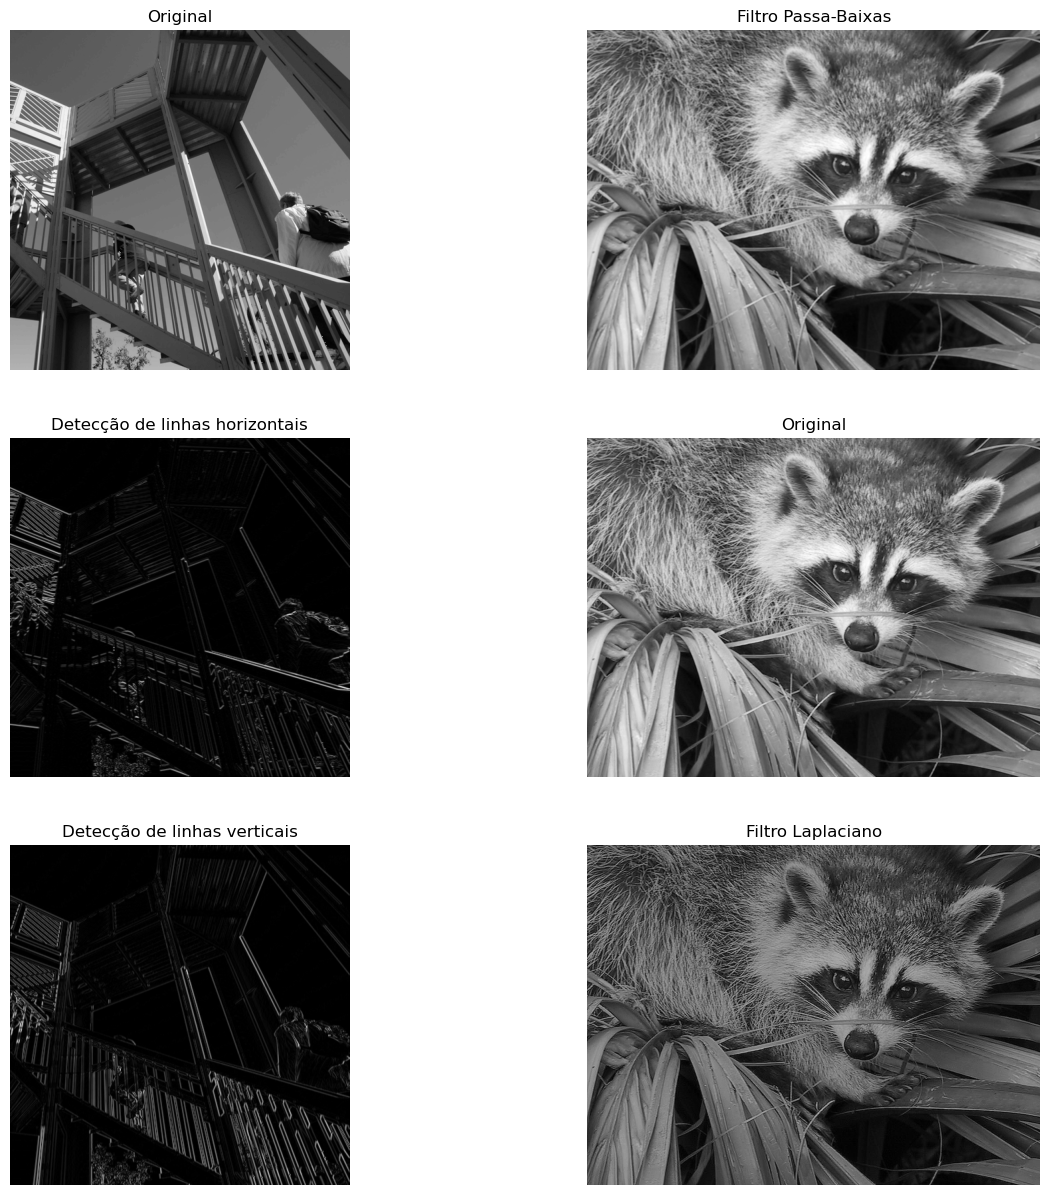

In [8]:
fig, ((ax_1, ax_4), (ax_2, ax_5), (ax_3, ax_6)) = plt.subplots(3, 2, figsize=(15, 15))
ax_1.imshow(ascent, cmap='gray')
ax_1.set_title('Original')
ax_1.set_axis_off()
ax_2.imshow(np.absolute(signal.convolve2d(ascent, kernel_x, boundary='symm', mode='same')), cmap='gray')
ax_2.set_title('Detecção de linhas horizontais')
ax_2.set_axis_off()
ax_3.imshow(np.absolute(signal.convolve2d(ascent, kernel_y, boundary='symm', mode='same')), cmap='gray')
ax_3.set_title('Detecção de linhas verticais')
ax_3.set_axis_off()
ax_4.imshow(np.absolute(signal.convolve2d(face, filtro_PassaBaixas, boundary='symm', mode='same')), cmap='gray')
ax_4.set_title('Filtro Passa-Baixas')
ax_4.set_axis_off()
ax_5.imshow(face, cmap='gray')
ax_5.set_title('Original')
ax_5.set_axis_off()
ax_6.imshow(np.absolute(signal.convolve2d(face, filtro_Laplaciano, boundary='symm', mode='same')), cmap='gray')
ax_6.set_title('Filtro Laplaciano')
ax_6.set_axis_off()

#### O processo de convolução

O processo de convolução consistem em passar uma matriz (geralmente quadrada, 3x3 ou 5x5) por toda a imagem. O passo a passo desta operação está exemplificado abaixo:

<img src="https://miro.medium.com/v2/resize:fit:1400/0*iELrT0kNe_H6ivaj.gif" width="700"/>

\begin{equation}
\begin{bmatrix}
7 & 2 & 3 & 3 & 8\\
4 & 5 & 3 & 8 & 4\\
3 & 3 & 2 & 8 & 4\\
2 & 8 & 7 & 2 & 7\\
5 & 4 & 4 & 5 & 4
\end{bmatrix}
 \times
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix} =
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\end{equation}

\begin{equation}
\begin{bmatrix}
\color{red}7 & \color{red}2 & \color{red}3 & 3 & 8\\
\color{red}4 & \color{red}5 & \color{red}3 & 8 & 4\\
\color{red}3 & \color{red}3 & \color{red}2 & 8 & 4\\
2 & 8 & 7 & 2 & 7\\
5 & 4 & 4 & 5 & 4
\end{bmatrix}
 \times
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix} =
\begin{bmatrix}
\color{red}{a_{11}} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\end{equation}

\begin{equation}
a_{11} = 1 \times 7 + 0 \times 2 - 1 \times 3 + 1 \times 4 + 0 \times 5 - 1 \times 3 + 1 \times 3 + 0 \times 3 - 1 \times 2 = 6
\end{equation}

\begin{equation}
\begin{bmatrix}
7 & \color{red}2 & \color{red}3 & \color{red}3 & 8\\
4 & \color{red}5 & \color{red}3 & \color{red}8 & 4\\
3 & \color{red}3 & \color{red}2 & \color{red}8 & 4\\
2 & 8 & 7 & 2 & 7\\
5 & 4 & 4 & 5 & 4
\end{bmatrix}
 \times
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix} =
\begin{bmatrix}
6 & \color{red}{a_{12}} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\end{equation}

\begin{equation}
a_{12} = 1 \times 2 + 0 \times 3 - 1 \times 3 + 1 \times 5 + 0 \times 3 - 1 \times 8 + 1 \times 3 + 0 \times 2 - 1 \times 8 = -9
\end{equation}

\begin{equation}
 \cdots
\end{equation}

\begin{equation}
\begin{bmatrix}
7 & 2 & 3 & 3 & 8\\
4 & 5 & 3 & 8 & 4\\
3 & 3 & \color{red}2 & \color{red}8 & \color{red}4\\
2 & 8 & \color{red}7 & \color{red}2 & \color{red}7\\
5 & 4 & \color{red}4 & \color{red}5 & \color{red}{4}
\end{bmatrix}
 \times
\begin{bmatrix}
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{bmatrix} =
\begin{bmatrix}
6 & -9 & -8\\
-3 & -2 & -3\\
-3 & 0 & \color{red}{a_{33}}
\end{bmatrix}
\end{equation}

\begin{equation}
a_{33} = 1 \times 2 + 0 \times 8 - 1 \times 4 + 1 \times 7 + 0 \times 2 - 1 \times 7 + 1 \times 4 + 0 \times 5 - 1 \times 4 = -2
\end{equation}

Essa operação é perfeita para a Visão Computacional porque em geral, da ênfase nas características que distinguem um item de outro. Além disso, a quantidade de informação necessária diminui, porque o treinamento é feito nas características destacadas.

Este é o conceito das **Redes Neurais Convolucionais (CNN)**. Adicionamos algumas camadas de convolução antes das camadas densas e a informação que as camadas densas recebem são mais focadas e mais certeiras.

Além disso, toda camada de convolução é seguida de uma camada de `Maxpooling`. Essa operação pega o pixel de maior valor dentro de um certo intervalo, exemplificado na figura a seguir:

<img src="https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif" width="400"/>

Veremos um pouco mais do impacto dessa operação nas imagens e nas dimensões das imagens quando montarmos nosso modelo.

#### Criando nosso modelo

Todo o trabalho de implementação dos filtros da convolução e a compressão realizada pelo '*pooling*' é simplificado pelo tensorflow, basta definir as camadas de convolução e pooling através de seus métodos.

Anteriormente, nossa Rede Neural tinha o seguinte formato:

```
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
```

Com uma camada de entrada, do mesmo formato dos nossos dados, uma camada de saída com o número de classes do nosso dataset e uma camada oculta entre ambas. Com o `Flatten()` transformando nossa entrada matricial 28x28, em um vetor unidimensional de 784 posições.

Para a convolução, o código equivalente é mostrado abaixo, onde as três últimas linhas são as mesmas do anterior (o `Flatten()`, a camada densa oculta com 128 neurônios e a camada densa de saída, com 10 neurônios).

A diferença real está nas primeiras linhas:

- A convolução é definida na linha `tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')` (deixei os argumentos explícitos na primeira para melhorar o entendimento).
  - Essa camada define que o keras irá gerar 64 filtros (`filters=64`) de dimensão 3x3 (`kernel_size=(3,3)`), com a função de ativação `ReLU` (em resumo: os valores negativos são descartados).
  - O valor de `64` para o número de filtros não é aleatório, mas também não está no escopo específico agora. Para entender um pouco mais acessar [Convolutional Neural Networks (Course 4 of the Deep Learning Specialization)](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF).
- Outra mudança é no formato dos dados, antes `(28,28)`, agora `(28,28,1)`, mas isso apenas está informando que a dimensão de cor só usa 1 byte, já que estamos usando escala de cinza.
- Após a convolução, temos a criação da camada de *pooling* `tf.keras.layers.MaxPooling2D(pool_size=(2,2))` (novamente, deixei os argumentos explícitos na primeira para melhorar o entendimento).
  - O uso do `MaxPooling` indica que o valor escolhido pelo *pooling* será o maior valor entre os analisados.
  - A quantidade de pixels analisados por vez é indicado por `pool=(2,2)`, ou seja, 4 pixels por vez, de onde somente o maior valor será mantido (assim como na figura mostrada acima).

Definimos então, uma segunda camada de Convolução com Max Pooling para ser aplicada em cima da primeira camada de convolução.

Assim, quando a imagem chega ao `Flatten()` ela foi reduzida para 1/4 de seu tamanho duas vezes, ou seja, o conteúdo foi muito simplificado.

O objetivo disto, é que a Convolução filtre as *features* (características) que determinam a saída.

In [9]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Um método do modelo bem útil é o `summary()`, que permite a inspeção das camadas do modelo e como a imagem será modificada em cada camada da Rede.

Uma característica interessante mostrada é o formato da saída de cada camada:

- Na primeira camada de Convolução, nossa imagem de `28x28 pixels`, se transforma em `64` imagens de `26x26 pixels` (essa redução no tamanho é uma característica da convolução de perder as bordas da imagem).
- Na primeira camada de Max Pooling, as 64 imagens geradas pela convolução tem seu tamanho reduzido pela metade.
- A segunda convolução novamente reduz a dimensão da imagem em 2 pixels em cada eixo, gerando `64 imagens`, com a nova dimensão.
- A segunda camada de Max Polling mostra que a redução de tamanho é arredondada para baixo, então a camada anterior de `11x11 pixels`, é reduzida pela metade, resultando em `5x5 pixels`. **OBS.:** Repare que não temos 1 imagem sendo recebida agora. Antes tínhamos 1 imagem dos `28x28 pixels` originais, e agora temos `64 imagens` de `5x5 pixels`.
- Agora chegamos ao ponto similar a Rede Neural dos exemplos anteriores. A camada `Flatten()` recebe as `64 imagens` de `5x5 pixels` e as transforma em um vetor unidimensional de `64x5x5 = 1600 posições`, como indicado pela saída dessa camada e diferente dos `784` que tínhamos na Rede dos exemplos anteriores.

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Agora vamos treinar e avaliar a Rede Neural Convolucional que criamos acima:

In [11]:
# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4374 - accuracy: 0.8413
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2950 - accuracy: 0.8918
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2484 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2155 - accuracy: 0.9204
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1885 - accuracy: 0.9299


In [13]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.9065999984741211
Perda nos dados de teste: 0.25584423542022705


Podemos ver pelos resultados da acurácia e perda, tanto no treinamento, quanto nos dados de teste, que em relação ao modelo dos exemplos anteriores tivemos uma melhora.

Para relembrar o resultado do exemplo anterior, o código pode ser testado no início do notebook. Mas em resumo, os resultados para 5 épocas são em média:

|  | Rede Neural | Rede Neural Convolucional |
| --- | --- | --- |
| acurácia treino | 89% | 92% |
| perda treino | 0.27 | 0.18 |
| acurácia teste | 86% | 90% |
| perda teste | 0.38 | 0.25 |

#### Uma observação sobre overfitting

Podemos tentar realizar o treinamento por mais épocas, por exemplo, 20, e explorar os resultados. Mas apesar de parecer uma boa escolha, veremos que os resultados da validação apresentarão uma piora, devido ao problema do "overfitting".

Em resumo, o "overfitting" ocorre quando a rede aprende tão bem com os dados de treino que fica quase especializada somente neles, e acaba por ser menos efetiva em interpretar dados aos quais ainda não foi exposta.

#### Explorando o funcionamento das convoluções graficamente

Vamos explorar graficamente como as convoluções funcionam.

A célula abaixo imprime os primeiros 100 elementos dos labels nos dados de teste, como podemos ver os índices `0`, `23` e `28` têm  todos o mesmo valor (`9`), ou seja, são todos 'ankle boots'.

Ao observar o resultado da convolução em cada uma das imagens começaremos a ver os surgimento de features em comum entre elas.

Agora, quando a camada densa está treinando com a saída das camadas de convolução como entrada, ela estará trabalhando com dados mais simplificados e talvez comece a encontrar semelhanças entre os sapatos, baseado na combinação Convolução/Pooling.

In [14]:
print(f"First 100 labels:\n\n{test_labels[:100]}")

print(f"\nShoes: {[i for i in range(100) if test_labels[:100][i]==9]}")

First 100 labels:

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]

Shoes: [0, 23, 28, 39, 68, 83]


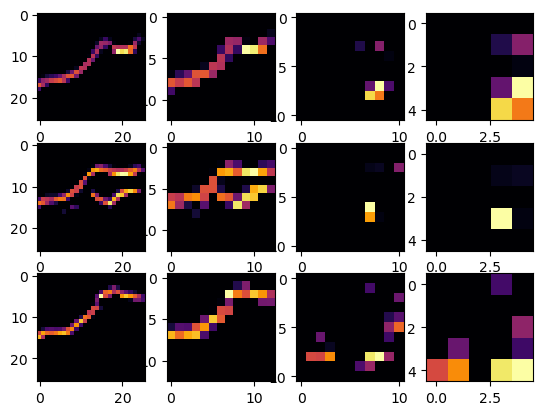

In [15]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

##### Para observar imagens aleatórias de uma classe definida:

Pullover: [1, 16, 20, 46, 48, 49, 54, 55, 66, 72, 74, 77, 87, 99]


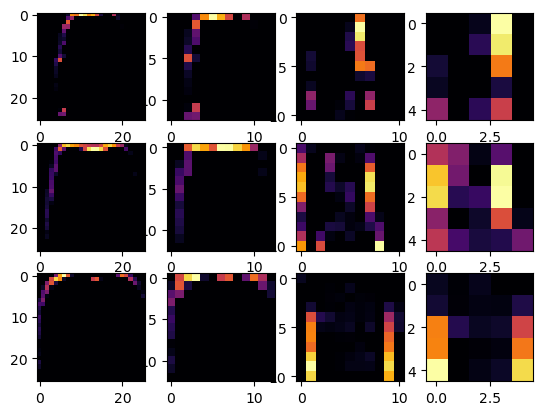

In [16]:
classes = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
           6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot" }

obj = 2

objs = [i for i in range(100) if test_labels[:100][i]==obj]

print(f"{classes[obj]}: {objs}")

images = np.random.choice(objs, size=3)

CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[images[0]].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[images[1]].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[images[2]].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

### Exercícios propostos

In [17]:
# Importando as bibliotecas utilizadas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

#### 1. Tente editar as convoluções. Mude de 64 para filtros de 16 ou 32. Verifique qual o impacto destas mudanças na acurácia e/ou tempo de treinamento.

##### Filtros de 64

In [31]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [33]:
# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4440 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2944 - accuracy: 0.8937
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2479 - accuracy: 0.9088
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2178 - accuracy: 0.9194
Epoch 5/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1913 - accuracy: 0.9281


In [34]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.910099983215332
Perda nos dados de teste: 0.256389856338501


##### Filtros de 32

In [36]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [38]:
# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4580 - accuracy: 0.8340
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3104 - accuracy: 0.8877
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2652 - accuracy: 0.9021
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2364 - accuracy: 0.9122
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2130 - accuracy: 0.9205


In [39]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.907800018787384
Perda nos dados de teste: 0.25174081325531006


##### Filtros de 16

In [40]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [43]:
# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5149 - accuracy: 0.8113
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3574 - accuracy: 0.8702
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3168 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2859 - accuracy: 0.8942
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2659 - accuracy: 0.9008


In [44]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.8913999795913696
Perda nos dados de teste: 0.3016304075717926


##### Avaliando os resultados:

| Número de filtros | 64 | 32 | 16 |
| --- | --- | --- | --- |
| Tempo de treinamento | 37s | 19s | 12s |
| Acurácia de treinamento | 0.9281 | 0.9205 | 0.9008 |
| Perda de treinamento | 0.1913 | 0.2130 | 0.2659 |
| Acurácia de teste | 0.9101 | 0.9078 | 0.8914 |
| Perda de teste | 0.2564 | 0.2517 | 0.3016 |

O tempo de treinamento decai pela metade conforme diminuímos a quantidade de filtros. Isso pode ser explicado pelo fato que ao diminuir a quantidade de filtros, diminuimos a quantidade de informação que a rede tem de processar, o que é visto pelo tamanho do vetor que chega a camada densa (saída da camada `Flatten`). Para 64 filtros temos um vetor de 1600 posições, para 32 filtros temos 800 posições e para 116 filtros temos 400 posições.

Já em relação às métricas da rede, a acurácia e a perda pioram quando diminuímos o tamanho dos filtros.

**OBS.:** Os valores da tabela não são tão consistentes, pois o resultado foi obtido rodando apenas uma vez cada possibilidade, então há uma certa aleatoriedade relacionada ao chute inicial da rede. Como na perda para os dados de teste, que obteve um valor melhor para 32 filtros que para 64. Por isso, anteriormente os resultados eram obtidos em cima da média dos resultados de 5 tentativas, mas aqui o tempo para cada treinamento aumentou a ponto de se tornar inviável. Então, considere sempre esse efeito do chute inicial da rede ao interpretar os resultados da rede, principalmente quando estamos treinando para tão poucas épocas.

#### 2. Remova a convolução final. Verifique qual o impacto destas mudanças na acurácia e/ou tempo de treinamento.

In [45]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 10816)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               1384576   
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
___________________________________________

In [47]:
# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3772 - accuracy: 0.8662
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2533 - accuracy: 0.9073
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2054 - accuracy: 0.9240
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1723 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1443 - accuracy: 0.9453


In [48]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.9143000245094299
Perda nos dados de teste: 0.25656378269195557


##### Avaliando os resultados:

Os números obtidos para o caso de 2 camadas de convolução são os mesmos do exercício proposto 1.

| Número de convoluções | 2 | 1 |
| --- | --- | --- |
| Tempo de treinamento | 37s | 56s |
| Acurácia de treinamento | 0.9281 | 0.9453 |
| Perda de treinamento | 0.1913 | 0.1443 |
| Acurácia de teste | 0.9101 | 0.9143 |
| Perda de teste | 0.2564 | 0.2566 |

O tempo de treinamento aumentou consideravelmente, apesar de diminuir o número de convoluções, o que é explicado pela saída da camada `Flatten`. No caso de **2 camadas de convolução**, a camada densa da rede recebia um vetor de 1600 posições, enquanto para apenas **1 camada de convolução**, esse vetor sobe para 10816 posições, já que a redução de tamanho das imagens é realizada apenas uma vez.

#### 3. E adicionar mais convoluções? Experimente e veja o impacto.

In [49]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 64)       

In [52]:
# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5)

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5685 - accuracy: 0.7913
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3800 - accuracy: 0.8594
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3277 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2940 - accuracy: 0.8904
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2675 - accuracy: 0.8999


In [53]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.8889999985694885
Perda nos dados de teste: 0.30926817655563354


##### Avaliando os resultados:

Nossas métricas pioraram, mas já era algo claro quando analisamos as saídas de cada camada da rede, onde vimos que as imagens seriam reduzidas à 1 pixel após a última camada de `Maxpooling`.

Então, não é uma boa ideia termos mais que 2 camadas de convolução.

#### 4. No exemplo anterior vimos o uso de `Callbacks` para verificar a função de perda e parar o treinamento caso o valor chegasse a um limite. Tente implementar os callbacks para o modelo de CNN.

In [54]:
# Definindo o modelo de Rede Neural Convolucional
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilando a rede:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [56]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Para o treinamento quando a acurácia, é maior que 0.9

        Args:
            epoch (integer) - índice da época (necessário, mas não é usado na definição da função abaixo)
            logs (dict) - resultados das métricas de cada época de treinamento
        '''
        if logs['accuracy'] >= 0.9:
            print(f"\nAcurácia de {(logs.get('accuracy')*100):.2f}% alcançada, cancelando o treinamento!")
            self.model.stop_training = True
        if logs['loss'] < 0.2:
            # Para se o limiar foi atingido
            print(f"\nPerda de {logs['loss']:.4f}, cancelando o treinamento!")
            self.model.stop_training = True

In [57]:
callbacks = myCallback()

# Treinando o modelo:
print("Treinando o modelo:")
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Treinando o modelo:
Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4391 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2967 - accuracy: 0.8921
Epoch 3/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9070
Acurácia de 90.69% alcançada, cancelando o treinamento!
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2498 - accuracy: 0.9069


In [58]:
# Avaliando nos dados de teste:
print("Evaluation:")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Acurácia nos dados de teste: {test_accuracy}")
print(f"Perda nos dados de teste: {test_loss}")

Evaluation:
Acurácia nos dados de teste: 0.895799994468689
Perda nos dados de teste: 0.27944615483283997


##### Avaliando os resultados:

A adição de `callbacks` às Redes Neurais Convolucionais é feita da mesma forma que para as Redes Neurais comuns no tensorflow, bastando declará-las e adicionar como argumento ao método `fit`.

Para a função definida, nosso treinamento terminou ao fim da 3ª época, onde atingimos uma acurácia mínima de 90%.